In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('CardioGoodFitness.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.shape

(180, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75e8233b70>,
      dtype=object)

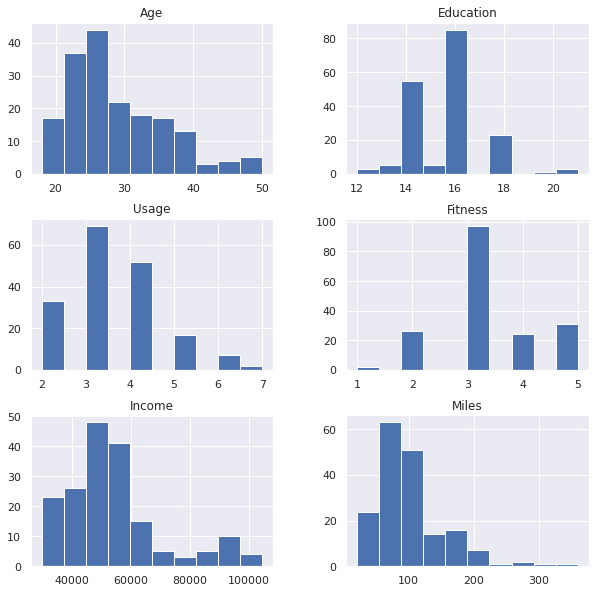

In [7]:
df.hist(figsize=(10,10))

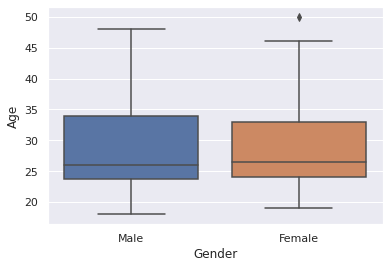

In [8]:
sns.boxplot(x='Gender', y='Age', data=df);

In [10]:
# Frequency Table Categorical variable makes sense 
pd.crosstab(df['Product'], df['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [13]:
pd.crosstab(df['Product'], df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


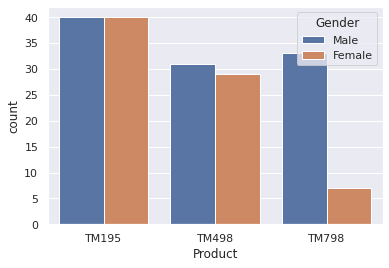

In [24]:
sns.countplot(df['Product'], hue=df['Gender']);

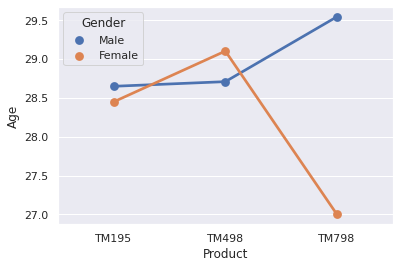

In [25]:
sns.pointplot(df['Product'],df['Age'], hue=df['Gender'], ci=None);

In [34]:
pd.pivot_table(df, index=['Product','Gender'], columns=['MaritalStatus'], aggfunc=len)

Age        Education  ...  Miles     Usage       
MaritalStatus  Partnered Single Partnered  ... Single Partnered Single
Product Gender                             ...                        
TM195   Female        27     13        27  ...     13        27     13
        Male          21     19        21  ...     19        21     19
TM498   Female        15     14        15  ...     14        15     14
        Male          21     10        21  ...     10        21     10
TM798   Female         4      3         4  ...      3         4      3
        Male          19     14        19  ...     14        19     14

[6 rows x 12 columns]

In [37]:
pd.pivot_table(df, 'Income',index=['Product','Gender'], columns=['MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

In [38]:
pd.pivot_table(df, 'Age',index=['Product','Gender'], columns=['MaritalStatus'])

MaritalStatus   Partnered     Single
Product Gender                      
TM195   Female  28.333333  28.692308
        Male    31.380952  25.631579
TM498   Female  30.000000  28.142857
        Male    30.380952  25.200000
TM798   Female  29.000000  24.333333
        Male    30.000000  28.928571

In [39]:
pd.pivot_table(df, 'Miles',index=['Product','Gender'], columns=['MaritalStatus'])

MaritalStatus    Partnered      Single
Product Gender                        
TM195   Female   74.925926   78.846154
        Male     80.190476   99.526316
TM498   Female   94.000000   80.214286
        Male     87.238095   91.100000
TM798   Female  215.000000  133.333333
        Male    176.315789  147.571429

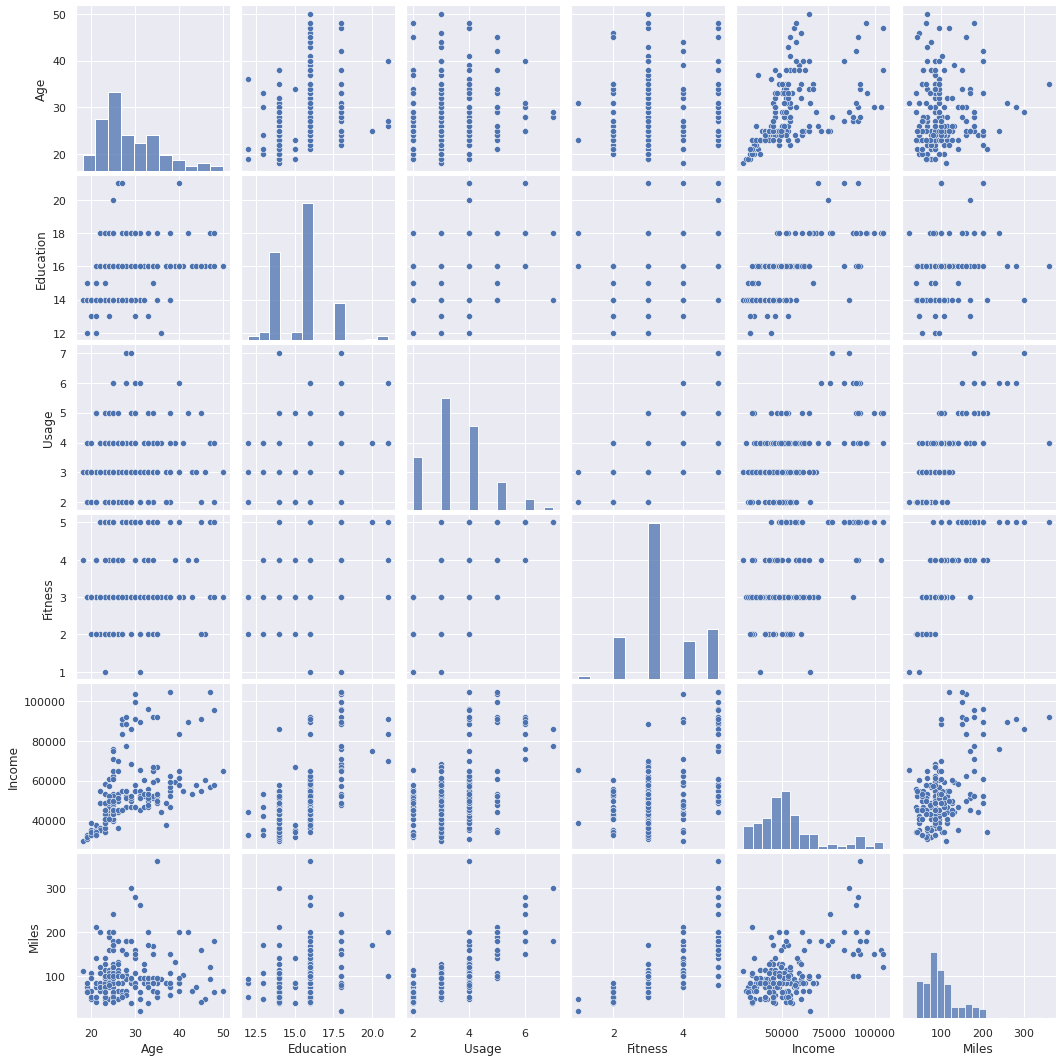

In [41]:
sns.pairplot(df);

In [42]:
df['Age'].std()

6.943498135399795

In [45]:
sns.distplot(df['Age'] , kde=True)

TypeError: ignored

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f75dc9bde80>,
      dtype=object)

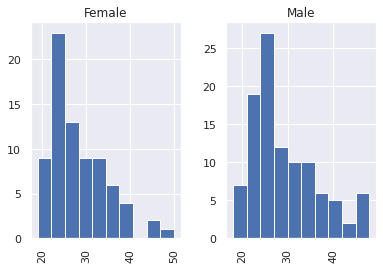

In [47]:
df.hist(by='Gender', column='Age')

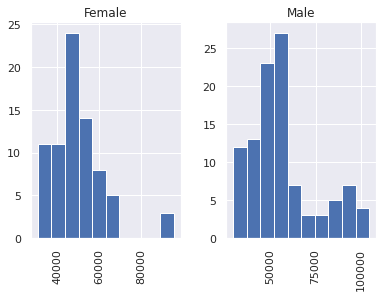

In [51]:
df.hist(by='Gender', column='Income');

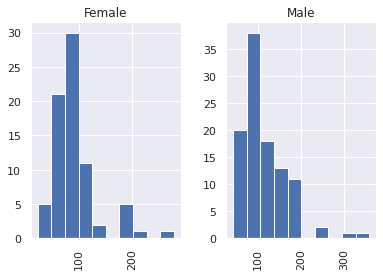

In [52]:
df.hist(by='Gender', column='Miles');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75dac002b0>,
      dtype=object)

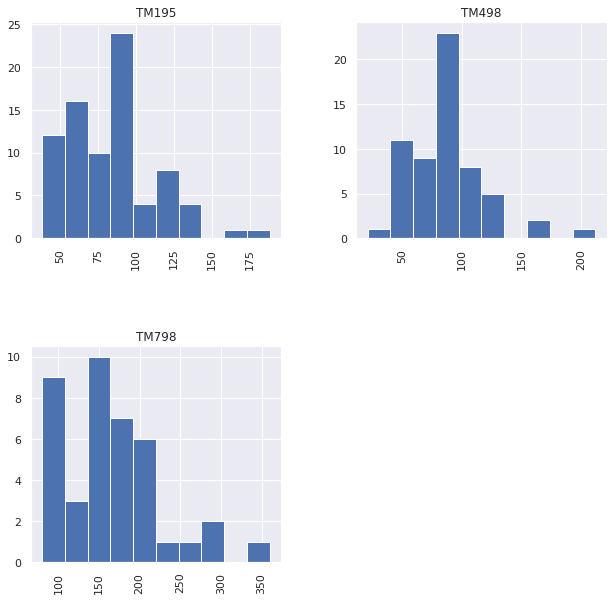

In [56]:
df.hist(by='Product', column='Miles', figsize=(10,10))

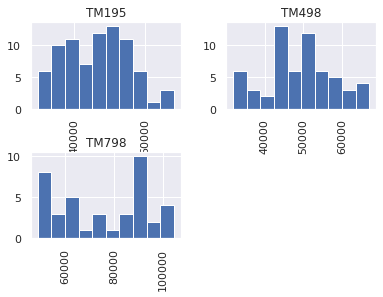

In [57]:
df.hist(by='Product', column='Income');

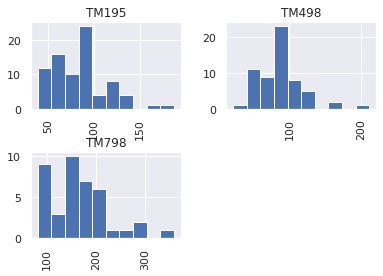

In [58]:
df.hist(by='Product', column='Miles');

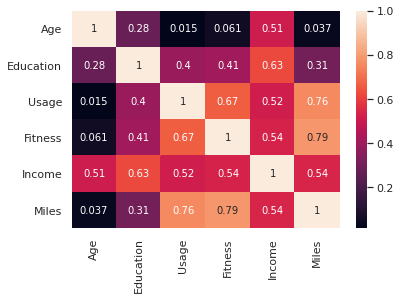

In [62]:
sns.heatmap(df.corr(),annot=True);